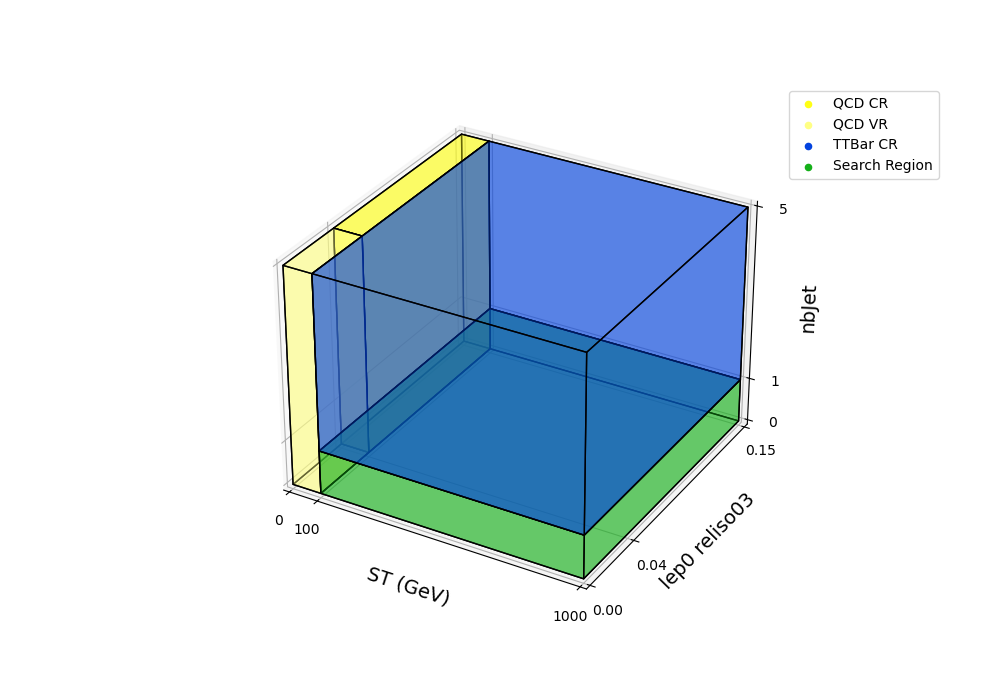

In [2]:
# Use matplotlib widget for interactive plotting
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create a figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Axes limits
ax.set_xlim(0, 1000)
ax.set_ylim(0, 0.15)
ax.set_zlim(0, 5)

# Function to set axis labels with an option to customize labels
def set_axis_labels(ax, x_label='ST (GeV)', y_label='lep0 reliso03', z_label='nbJet'):
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_zlabel(z_label, fontsize=14)

# Call the function to set axis labels
set_axis_labels(ax)

# Set fewer axis ticks
ax.set_xticks([0, 100, 1000])
ax.set_yticks([0, 0.04, 0.15])
ax.set_zticks([0, 1, 5])

# Define vertices for each region
qcd_cr_vertices = np.array([
    [0, 0.04, 0], [100, 0.04, 0], [100, 0.15, 0], [0, 0.15, 0],
    [0, 0.04, 5], [100, 0.04, 5], [100, 0.15, 5], [0, 0.15, 5]
])

qcd_vr_vertices = np.array([
    [0, 0, 0], [100, 0, 0], [100, 0.04, 0], [0, 0.04, 0],
    [0, 0, 5], [100, 0, 5], [100, 0.04, 5], [0, 0.04, 5]
])

ttbar_cr_vertices = np.array([
    [100, 0, 1], [1000, 0, 1], [1000, 0.15, 1], [100, 0.15, 1],
    [100, 0, 5], [1000, 0, 5], [1000, 0.15, 5], [100, 0.15, 5]
])

search_region_vertices = np.array([
    [100, 0, 0], [1000, 0, 0], [1000, 0.15, 0], [100, 0.15, 0],
    [100, 0, 1], [1000, 0, 1], [1000, 0.15, 1], [100, 0.15, 1]
])

# Function to plot a 3D box with outlines and labels
def draw_box(ax, vertices, face_color, edge_color, alpha=0.5):
    faces = [[vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]],
             [vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [2, 3, 7, 6]],
             [vertices[j] for j in [1, 2, 6, 5]],
             [vertices[j] for j in [4, 7, 3, 0]]]
    poly3d = [[tuple(p) for p in face] for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors=face_color, edgecolors=edge_color, linewidths=1, alpha=alpha))

# Plot each region with appropriate color schemes and dark outlines
draw_box(ax, qcd_cr_vertices, 'xkcd:yellow',       'k', 0.4)
draw_box(ax, qcd_vr_vertices, 'xkcd:pale yellow',  'k', 0.4)
draw_box(ax, ttbar_cr_vertices, 'xkcd:blue',       'k', 0.4)
draw_box(ax, search_region_vertices, 'xkcd:green', 'k', 0.4)

# Add legends by plotting invisible points with labels
ax.scatter([], [], [], color='xkcd:yellow', label='QCD CR')
ax.scatter([], [], [], color='xkcd:pale yellow', label='QCD VR')
ax.scatter([], [], [], color='xkcd:blue', label='TTBar CR')
ax.scatter([], [], [], color='xkcd:green', label='Search Region')

# Adjust legend position further away
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Enable interactive rotation
plt.show()
